In [ ]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

629.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


--2022-09-27 22:40:11--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
dlib.net (dlib.net) 해석 중... 107.180.26.78
다음으로 연결 중: dlib.net (dlib.net)|107.180.26.78|:80... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 64040097 (61M)
저장 위치: `shape_predictor_68_face_landmarks.dat.bz2.1'

shape_predictor_68_ 100%[===================>]  61.07M  2.15MB/s    /  31s     

2022-09-27 22:40:43 (1.94 MB/s) - `shape_predictor_68_face_landmarks.dat.bz2.1' 저장함 [64040097/64040097]



In [9]:
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

667.29s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


bunzip2: Can't open input file /content/shape_predictor_68_face_landmarks.dat.bz2: No such file or directory.


In [14]:
import dlib, cv2 # face detection  + recognition / 이미지 작업 
import numpy as np # 행렬 연산
# 결과물 출력
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

detector = dlib.get_frontal_face_detector() # 얼굴 탐지 모델
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat') # 얼굴 랜드마크 탐지 모델
facerec = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat') # 얼굴 인식 모델

In [33]:
# 얼굴을 찾는 함수 - Face Detection
def find_faces(img): # input - rgp image
    dets = detector(img, 1) # 얼굴을 찾은 결과물들이 dets에 들어감 

    if len(dets) == 0: # 얼굴을 찾지 못한 경우
        return np.empty(0), np.empty(0), np.empty(0) # 빈 배열 반환
    
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int) # 얼굴의 랜드마크를 구함
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        shape = sp(img, d) # 랜드마크 구하기 - 68개의 점 도출
        
        # convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

        shapes.append(shape)
        
    return rects, shapes, shapes_np

# 얼굴을 인코드 하는 함수 - Face Landmark Detection
def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)


# Compute Saved Face Descriptions

In [34]:
img_paths = { # 얼굴별 이미지와 이름 매칭
    'neo': 'img/neo.jpg',
    'trinity': 'img/trinity.jpg',
    'morpheus': 'img/morpheus.jpg',
    'smith': 'img/smith.jpg'
}

descs = { # 계산할 결과를 저장할 변수 설정
    'neo': None,
    'trinity': None,
    'morpheus': None,
    'smith': None
}

for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path) # 이미지 읽기
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # 컬러체계 변환
    
    _, img_shapes, _ = find_faces(img_rgb) # 얼굴 찾음
    # 전체 이미지와 각 사람의 랜드마크를 넣어줌
    # 인코딩된 결과를 각 사람의 이름에 맞게 저장
    descs[name] = encode_faces(img_rgb, img_shapes)[0] 
    
    np.save('img/descs.npy', descs)
    print(descs)

/var/folders/6s/ynxc8wjj2bxgkftv7l27s0wr0000gn/T/ipykernel_81337/3550527154.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int) # 얼굴의 랜드마크를 구함


{'neo': array([-0.10253667,  0.12106887,  0.11573791,  0.00205022, -0.07788968,
        0.04553083, -0.05843271, -0.05190916,  0.21658494,  0.01360171,
        0.22794822, -0.06277437, -0.2447032 , -0.07928556,  0.06872843,
        0.08918303, -0.18241554, -0.12478451,  0.02782025, -0.08309488,
        0.07161677,  0.05966333,  0.00160623,  0.06678442, -0.21823238,
       -0.36267728, -0.0669474 , -0.14702269,  0.04950855, -0.18448399,
       -0.06444678,  0.00363288, -0.21857825, -0.11856337,  0.02003653,
        0.11713761, -0.0747777 , -0.09792064,  0.14710161, -0.01258714,
       -0.1380441 ,  0.02091829,  0.04052265,  0.2269932 ,  0.20785403,
        0.07426947, -0.01183022, -0.07861377,  0.14942379, -0.25231519,
        0.09901296,  0.22049403,  0.09498686,  0.09029023,  0.09735824,
       -0.15367737, -0.03054982,  0.14856216, -0.26968357,  0.10302358,
        0.08786082,  0.01532098,  0.04833575, -0.04222208,  0.13174677,
        0.09351437, -0.0868369 , -0.11075908,  0.0428903

# Compute Input

In [37]:
img_bgr = cv2.imread('img/matrix5.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_bgr)
descriptors = encode_faces(img_rgb, shapes)

/var/folders/6s/ynxc8wjj2bxgkftv7l27s0wr0000gn/T/ipykernel_81337/3550527154.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int) # 얼굴의 랜드마크를 구함


# Visualize Output

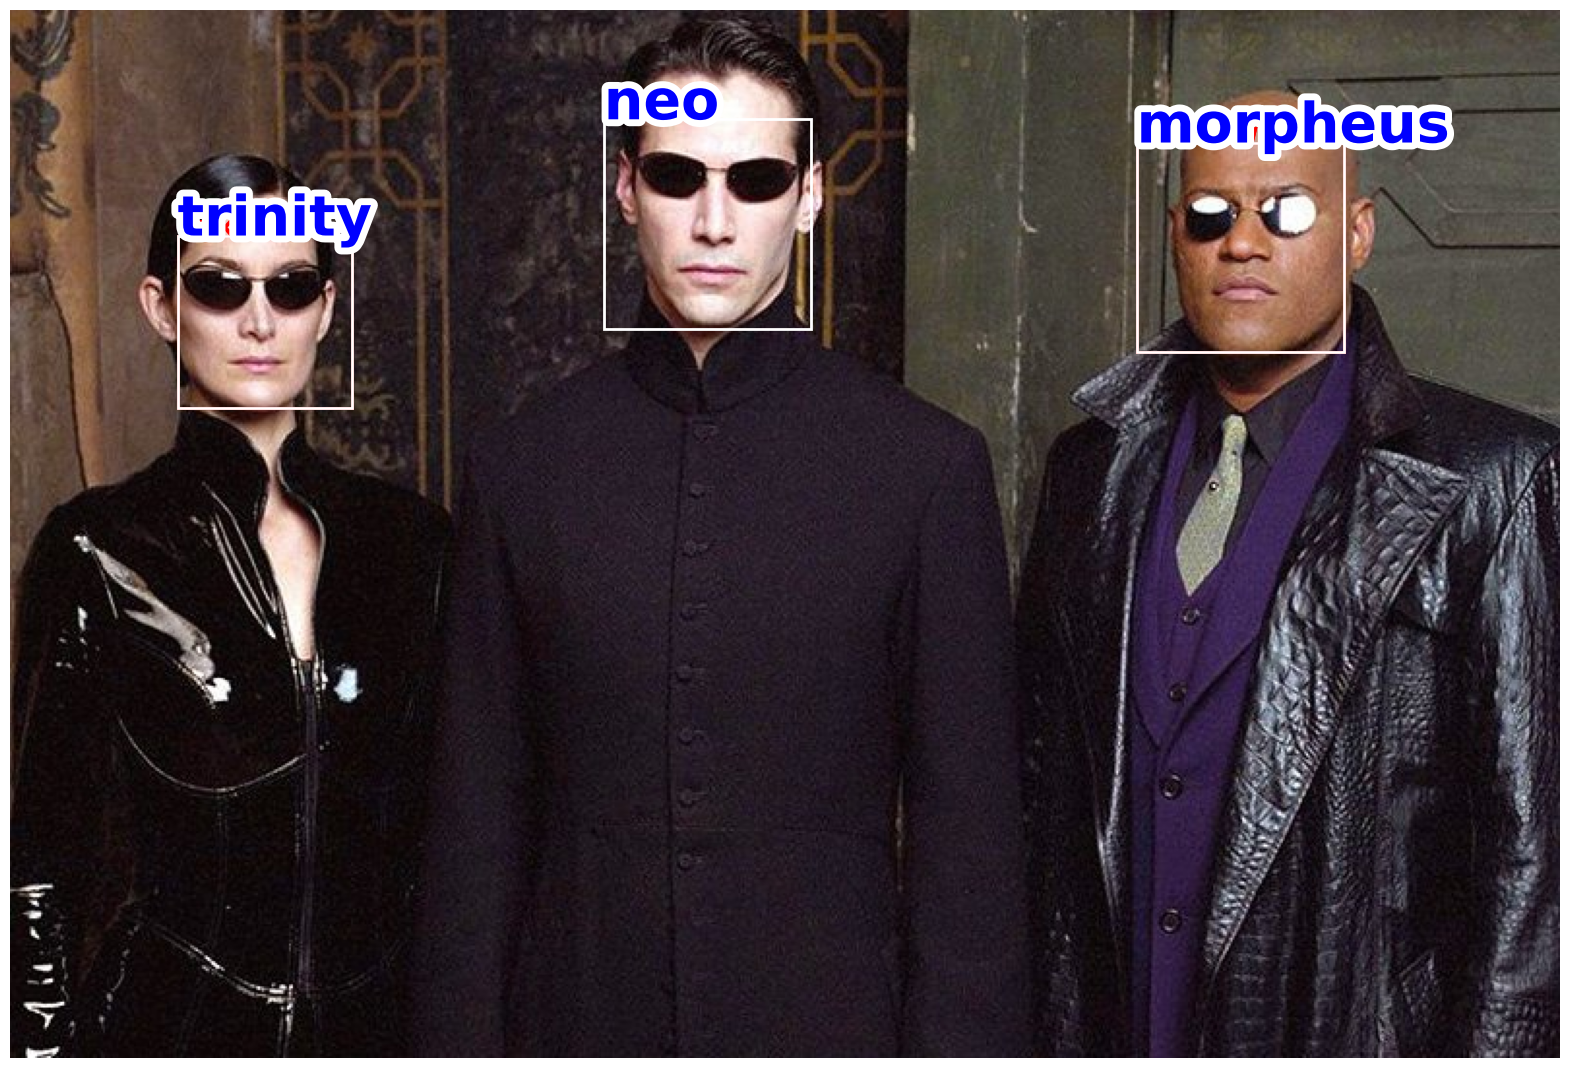

In [38]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    found = False
    for name, saved_desc in descs.items(): # 누가 누군지 비교하는 부분
        dist = np.linalg.norm([desc] - saved_desc, axis = 1) # desc, saved_desc 벡터 사이의 유클리드 거리 구함
        
        if dist < 0.6: # 0.6으로 했을때 성능이 제일 좋아서 사용
            found = True
            
            # bounding box 그리기
            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                           color = 'b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                     rects[i][1][1] - rects[i][0][1],
                                     rects[i][1][0] - rects[i][0][0],
                                     linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)
            
            break
        
        # 얼굴은 찾았으나 누군지 모르는 경우
        if not found:
            ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('result/output.png')
plt.show()

In [40]:
img_bgr = cv2.imread('img/matrix2.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_bgr)
descriptors = encode_faces(img_rgb, shapes)

/var/folders/6s/ynxc8wjj2bxgkftv7l27s0wr0000gn/T/ipykernel_81337/3550527154.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int) # 얼굴의 랜드마크를 구함


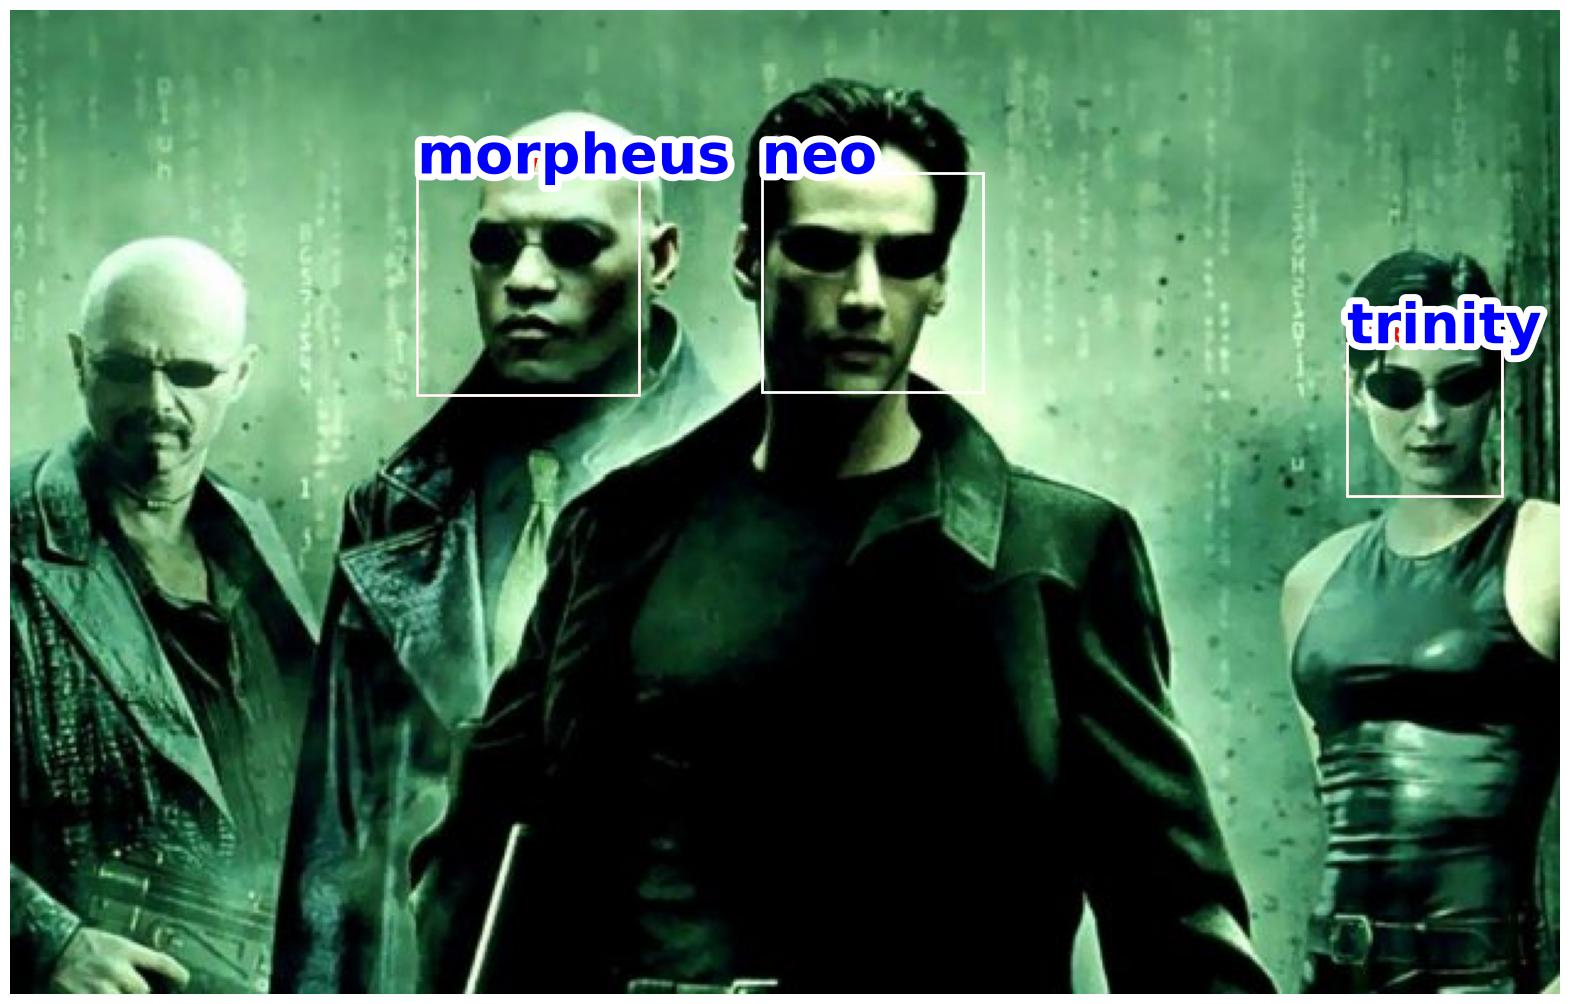

In [41]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    found = False
    for name, saved_desc in descs.items(): # 누가 누군지 비교하는 부분
        dist = np.linalg.norm([desc] - saved_desc, axis = 1) # desc, saved_desc 벡터 사이의 유클리드 거리 구함
        
        if dist < 0.6: # 0.6으로 했을때 성능이 제일 좋아서 사용
            found = True
            
            # bounding box 그리기
            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                           color = 'b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                     rects[i][1][1] - rects[i][0][1],
                                     rects[i][1][0] - rects[i][0][0],
                                     linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)
            
            break
        
        # 얼굴은 찾았으나 누군지 모르는 경우
        if not found:
            ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('result/output.png')
plt.show()

/var/folders/6s/ynxc8wjj2bxgkftv7l27s0wr0000gn/T/ipykernel_81337/3550527154.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int) # 얼굴의 랜드마크를 구함


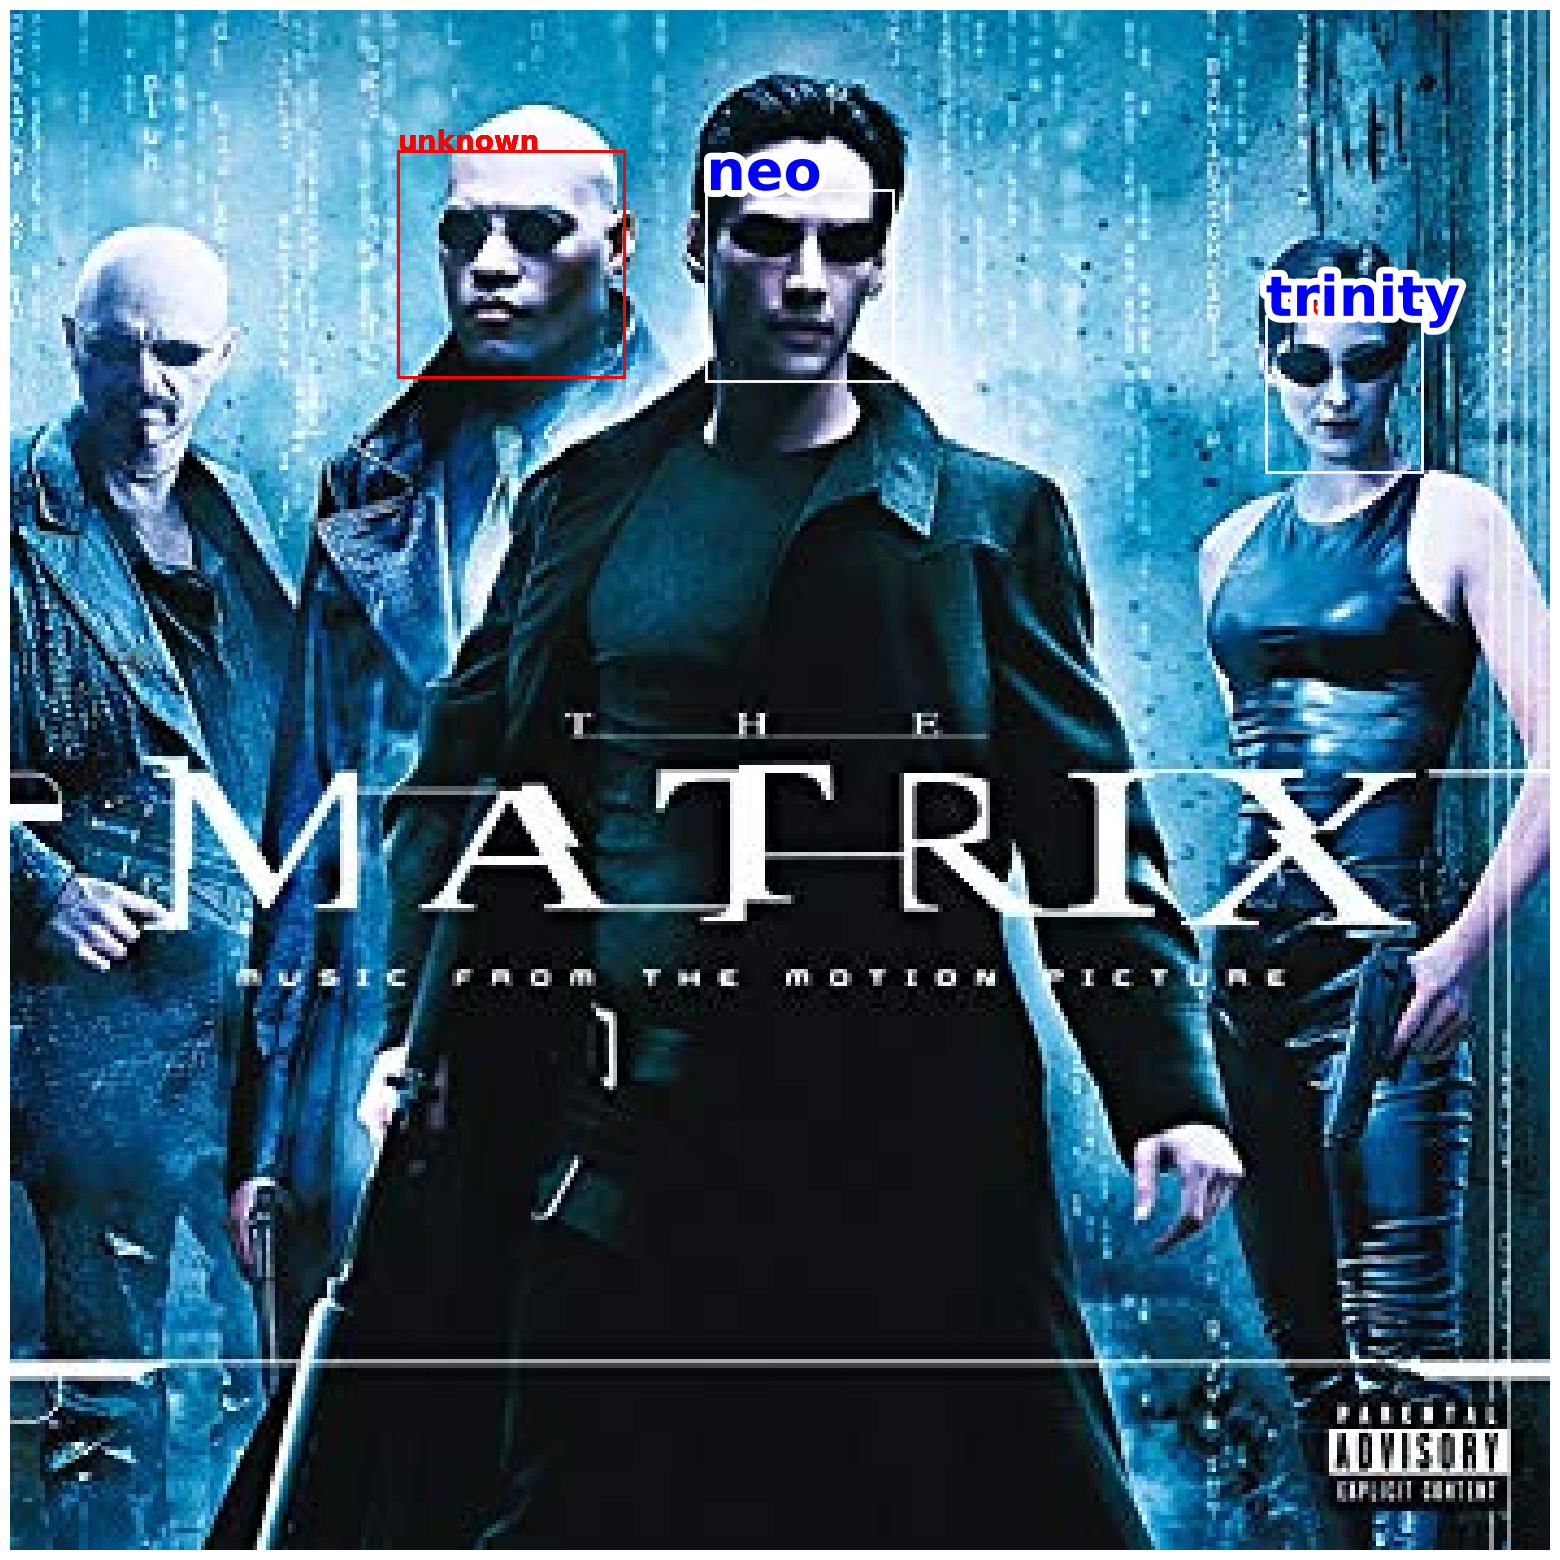

In [48]:
img_bgr = cv2.imread('img/matrix3.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_bgr)
descriptors = encode_faces(img_rgb, shapes)

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    found = False
    for name, saved_desc in descs.items(): # 누가 누군지 비교하는 부분
        dist = np.linalg.norm([desc] - saved_desc, axis = 1) # desc, saved_desc 벡터 사이의 유클리드 거리 구함
        
        if dist < 0.6: # 0.6으로 했을때 성능이 제일 좋아서 사용
            found = True
            
            # bounding box 그리기
            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                           color = 'b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                     rects[i][1][1] - rects[i][0][1],
                                     rects[i][1][0] - rects[i][0][0],
                                     linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)
            
            break
        
        # 얼굴은 찾았으나 누군지 모르는 경우
        if not found:
            ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('result/output.png')
plt.show()

/var/folders/6s/ynxc8wjj2bxgkftv7l27s0wr0000gn/T/ipykernel_81337/3550527154.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int) # 얼굴의 랜드마크를 구함


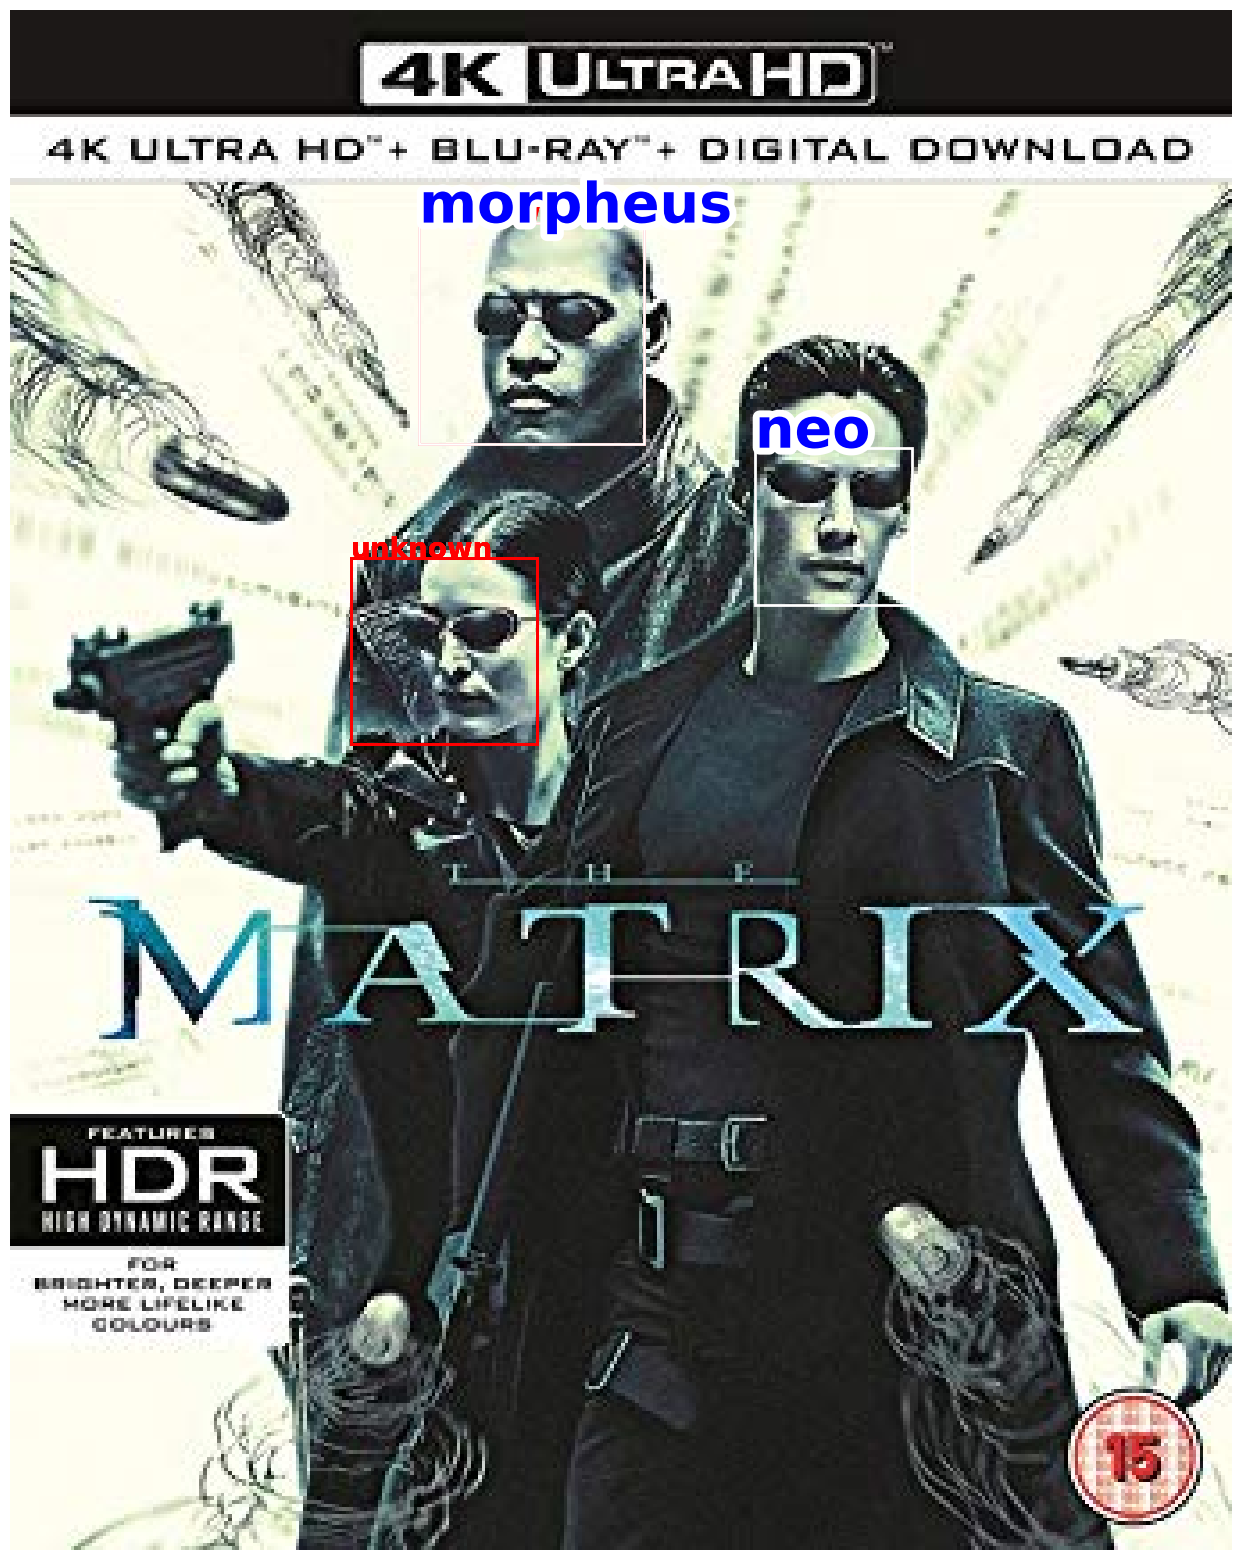

In [45]:
img_bgr = cv2.imread('img/matrix4.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_bgr)
descriptors = encode_faces(img_rgb, shapes)

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    found = False
    for name, saved_desc in descs.items(): # 누가 누군지 비교하는 부분
        dist = np.linalg.norm([desc] - saved_desc, axis = 1) # desc, saved_desc 벡터 사이의 유클리드 거리 구함
        
        if dist < 0.6: # 0.6으로 했을때 성능이 제일 좋아서 사용
            found = True
            
            # bounding box 그리기
            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                           color = 'b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                     rects[i][1][1] - rects[i][0][1],
                                     rects[i][1][0] - rects[i][0][0],
                                     linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)
            
            break
        
        # 얼굴은 찾았으나 누군지 모르는 경우
        if not found:
            ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('result/output.png')
plt.show()

/var/folders/6s/ynxc8wjj2bxgkftv7l27s0wr0000gn/T/ipykernel_81337/3550527154.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int) # 얼굴의 랜드마크를 구함


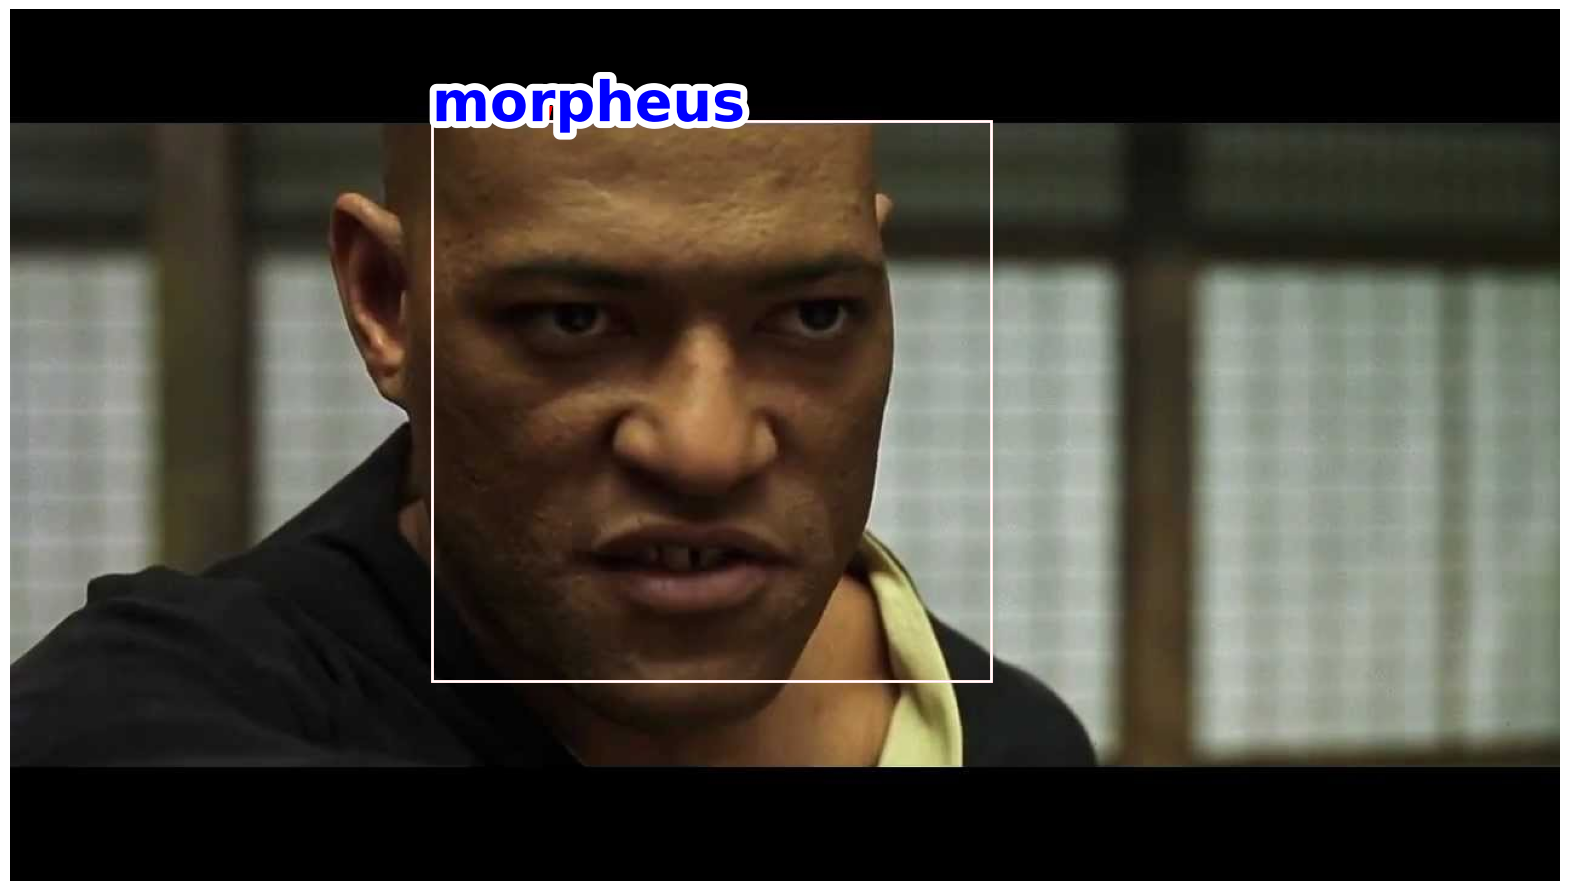

In [46]:
img_bgr = cv2.imread('img/morpheus.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_bgr)
descriptors = encode_faces(img_rgb, shapes)

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    found = False
    for name, saved_desc in descs.items(): # 누가 누군지 비교하는 부분
        dist = np.linalg.norm([desc] - saved_desc, axis = 1) # desc, saved_desc 벡터 사이의 유클리드 거리 구함
        
        if dist < 0.6: # 0.6으로 했을때 성능이 제일 좋아서 사용
            found = True
            
            # bounding box 그리기
            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                           color = 'b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                     rects[i][1][1] - rects[i][0][1],
                                     rects[i][1][0] - rects[i][0][0],
                                     linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)
            
            break
        
        # 얼굴은 찾았으나 누군지 모르는 경우
        if not found:
            ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('result/output.png')
plt.show()